# Análisis de Varianza - ANOVA
## ESTADISTICAS PARA NEGOCIOS
    Unidad 4. Producción de datos
    Actividad 6. Ejercicio.

    Alejandra Nohemi Villarreal Barron
    870140008
    Ing. Ciencia de Datos

    Docente: Octavio Avila Marron
    
    Monterrey, N.L. México a 4 de diciembre del 2022

In [1]:
# ggplot2 import
library(ggplot2)

In [24]:
students <- read.csv("https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv")

In [25]:
graduated <- subset(students, graduated == 1)

n <- 275
data.idx <- sample(x = 1:nrow(graduated), size = n)
data <- graduated[data.idx, c('major','salary')]
head(data, 10)

,major,salary
,<chr>,<dbl>
3117,Environmental Sciences,44984.00
4210,Economics and Finance,56732.16
88,Environmental Sciences,35191.66
7810,Environmental Sciences,29321.81
1803,Political Science,41569.68
5571,Mathematics and Statistics,54803.99
5756,Political Science,30008.16
7821,Economics and Finance,57765.71
7486,Biology,42742.79


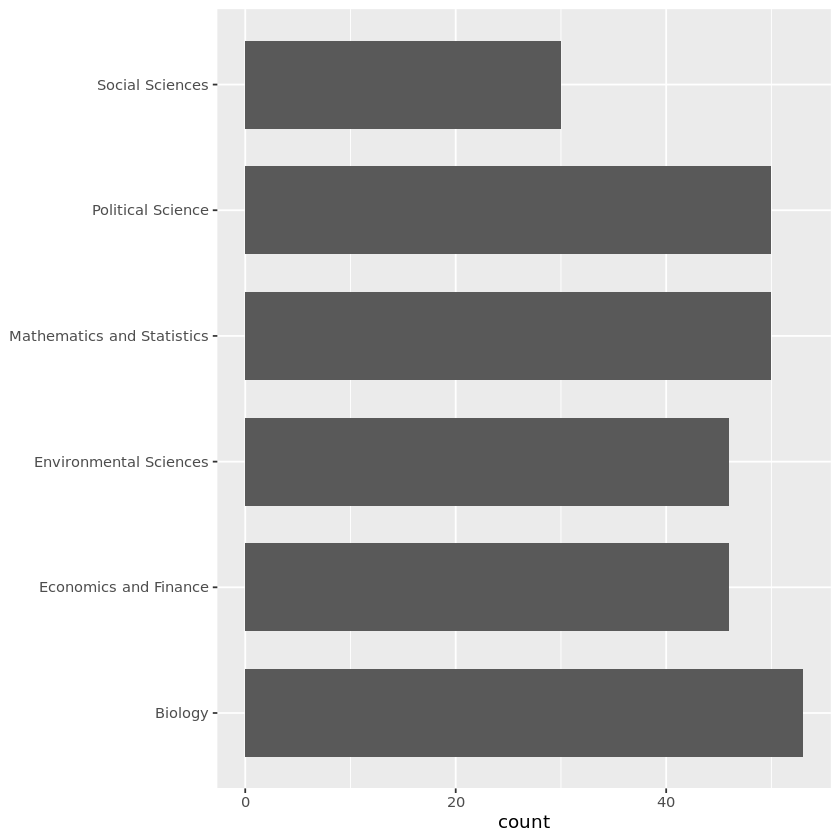

In [26]:
p <- ggplot(data, aes(major)) +
      geom_bar(width=.7) +
      coord_flip() +
      theme(axis.title.y=element_blank())
p

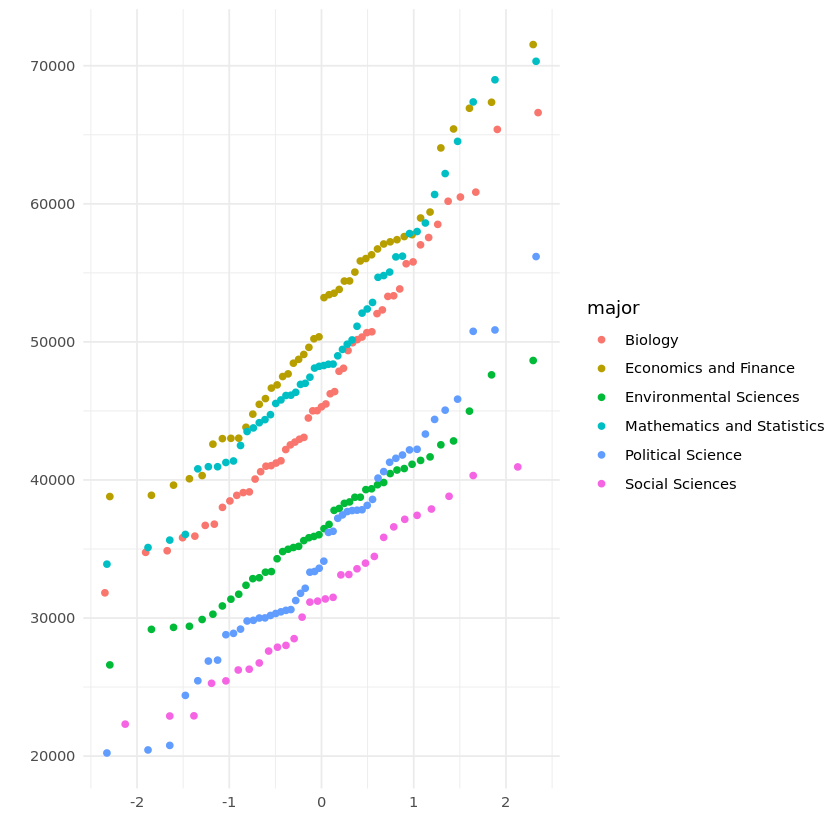

In [27]:
p <- qplot(sample = salary, 
      data = data, 
      color=major) +
     theme_minimal()
p

In [28]:
#calculate standart deviation
sd.groups <- tapply(X = data$salary, INDEX = data$major, FUN = sd)
sd.groups

Biology      Economics and Finance 
                  8407.978                   8109.304 
    Environmental Sciences Mathematics and Statistics 
                  4936.577                   8494.150 
         Political Science            Social Sciences 
                  7836.247                   5360.068

In [29]:
#calculate ratio of the largest to the smallest sample standard deviation
ratio <- max(as.vector(sd.groups)) / min(as.vector(sd.groups))
ratio

[1] 1.720656

# Hypothesis Testing
State the null hypothesis H0 and alternative hypothesis HA

In [30]:
alpha <- 0.01

In [55]:
k <- 6 #Grupos diferentes de materias
n <- nrow(data)

df.G <- k - 1
df.G

[1] 5

In [56]:
df.E <- n - k 
df.E

[1] 269

In [57]:
df.T <- n - 1
df.T

[1] 274

In [58]:
# calculate overall mean
x.bar <- mean(data$salary)

# observation data
xi <- data$salary

# calculate SST
SST <- sum((xi - x.bar)^2)
SST

[1] 30481620551

In [59]:
# calculate sample size for each group
n.j <- tapply(X = data$salary, INDEX = data$major, FUN = length)

# calculate mean for each group
xi.bar <- tapply(X = data$salary, INDEX = data$major, FUN = mean)

# calculate SSG
SSG <- sum(n.j * (xi.bar - x.bar)^2)
SSG

[1] 15372160866

In [60]:
# calculate standart deviation for each group
s2.j <- tapply(X = data$salary, INDEX = data$major, FUN = sd)

# calculate SSE
SSE <- sum((n.j-1)*s2.j^2)
SSE

[1] 15109459684

In [61]:
# calculate MSG
MSG <- SSG/(k-1)
MSG

[1] 3074432173

In [62]:
# calculate MSE
MSE <- SSE/(n-k)
MSE


[1] 56168995

In [63]:
Fstat <- MSG/MSE
Fstat

[1] 54.7354

In [64]:
df1 = k-1
df2 = n-k

p.value <- pf(q = Fstat, df1 = df1, df2 = df2, lower.tail = FALSE)
p.value

[1] 4.366137e-39

In [65]:
p.value <= alpha

[1] TRUE

In [66]:
anova <- aov(salary ~ major, data = data)
summary(anova)

             Df    Sum Sq   Mean Sq F value Pr(>F)    
major         5 1.537e+10 3.074e+09   54.73 <2e-16 ***
Residuals   269 1.511e+10 5.617e+07                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1